In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/MECHINE LEARNING/roc curve/Social_Network_Ads.csv')
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [ ]:
df.shape

(400, 3)

In [ ]:
df.info

<bound method DataFrame.info of      Age  EstimatedSalary  Purchased
0     19            19000          0
1     35            20000          0
2     26            43000          0
3     27            57000          0
4     19            76000          0
..   ...              ...        ...
395   46            41000          1
396   51            23000          1
397   50            20000          1
398   36            33000          0
399   49            36000          1

[400 rows x 3 columns]>

In [ ]:
df.isnull().sum()

,0
Age,0
EstimatedSalary,0
Purchased,0


In [ ]:
x = df . iloc[:,:2]

y = df.iloc[: ,-1]

x.head()

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000


In [ ]:
y.head()

,Purchased
0,0
1,0
2,0
3,0
4,0


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test , y_train , y_test = train_test_split(x, y ,test_size = 0.33 , random_state = 42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

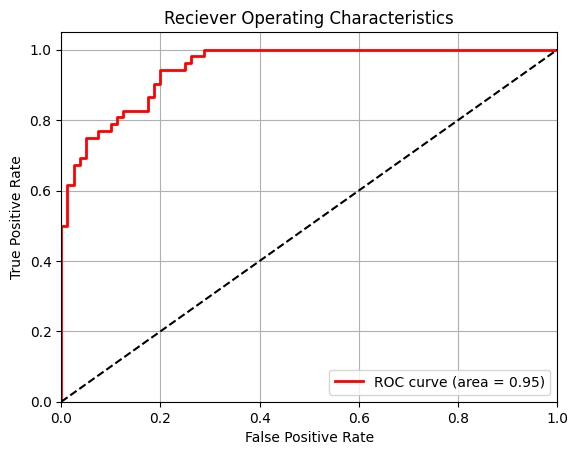

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
#from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc

#step 1 : Generate the syntheti data set
#x , y = make_classification(n_samples = 1000 , n_features = 10 , n_classes = 2 , random_state = 42)

# step 2 : split the data set into training and testing data sets
#x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = 0.3 ,random_state=42)

# step 3 : train a simple logistic regression model
model = LogisticRegression()
model.fit(x_train,y_train)

#step 4 : predict probabilities for the test set
y_scores = model.predict_proba(x_test)[:,1] #probabilities for the positive class

#step 5 : compute ROC curve
fpr,tpr,thresholds = roc_curve(y_test , y_scores)
roc_auc = auc(fpr,tpr)

#step 6 : plot theroc curve
plt.figure()
plt.plot(fpr,tpr,color  = "red" , lw = 2 , label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0,1],[0,1],color = 'black',linestyle='--') # diagonal line
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Reciever Operating Characteristics')
plt.legend(loc ='lower right')
plt.grid()
plt.show()